In [4]:
import numpy as np
import pandas as pd
import scipy.stats as sts
from scipy.stats import poisson
import matplotlib.pyplot as plt 
import math

## 1. [# 30] Предположим, у нас есть случайная выборка $X1, X2, … , Xn$ из распределения $Exp(\lambda)$. Предположим, мы хотим оценить среднее значение $1 \over \lambda$. Оценка $$T1 = Xn = {X1 + X2 + ... + Xn \over n}$$ ## является несмещенной оценкой, равной $1 \over \lambda$. <br /> Пусть $Mn$ – минимум из $$X1, X2, … , Xn$$ ## $Mn$ имеет распределение $Exp(n \lambda)$. Оценка $$T2 = n Mn$$ ## является другой несмещенной оценкой для $1 \over \lambda$. <br /> Какую из оценок $T1$ и $T2$ вы бы выбрали для оценки среднего значения $1 \over \lambda$? Обоснуйте свой ответ, составив модель и проведя 2000 экспериментов. Вычислите относительную эффективность одной оценки по отношению к другой. 

Задаем $1\over\lambda$ = 4

In [11]:
iter = 2000;
n = 10
df = pd.DataFrame(columns=['t1', 't2'])

for _ in range(iter):
    numbers = np.random.exponential(scale=4, size=n)
    t1 = numbers.mean()
    t2 = n * numbers.min()
    df.loc[len(df.index )] = [t1, t2]

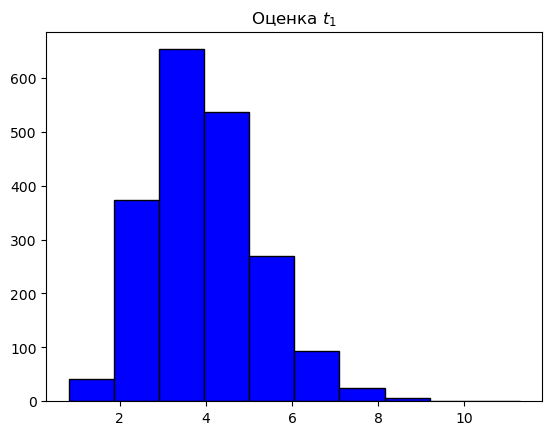

In [12]:
plt.hist(df['t1'], color = 'blue', edgecolor = 'black');
plt.title("Оценка $t_1$");
plt.savefig('t1', dpi = 200, transparent=True, bbox_inches = 'tight')

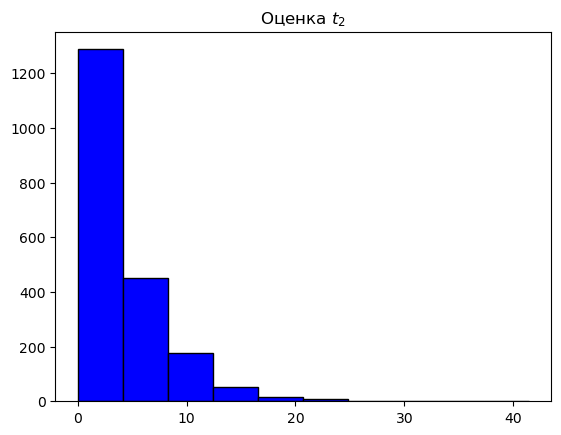

In [13]:
plt.hist(df['t2'], color = 'blue', edgecolor = 'black');
plt.title("Оценка $t_2$");

In [24]:
print("Var(T1) =", df.t1.std()**2)
print("Var(T2) =", df.t2.std()**2)

Var(T1) = 1.610529537874674
Var(T2) = 16.092740435402572


**Ответ:** Получается что оценка T1 является более эффективной, чем оценка T2, потому что $$Var(T1) < Var(T2)$$ 

## 2.1 Вычислите E[U1] и Var(U1)

U1 = T1 + 1/3($\pi$ − T1 − T2 − T3),
E[U1] = E[T1] + 1/3($\pi$ − E[T1] − E[T2] − E[T3]),

**E[U1]=α1 + 1/3($\pi$−α1−α2−α3)**

Var(U1)=Var(T1)+(1/3)^2*Var($\pi$−T1−T2−T3)
Var(U1)=σ^2+(1/3)^2*Var($\pi$−T1−T2−T3)

Var($\pi$−T1−T2−T3)=Var($\pi$)+Var(T1)+Var(T2)+Var(T3)
Var($\pi$−T1−T2−T3)=0+σ^2+σ^2+σ^2 = 3σ^2

**Var(U1) = σ^2 + (1/3)^2 * 3σ^2 = 2σ^2**

## 2.2 Какая из оценок U1 или T1 эффективнее для оценки угла a1? Вычислите относительную эффективность одной оценки по отношению к другой. Обоснуйте свой ответ, составив модель и проведя 2000 экспериментов.

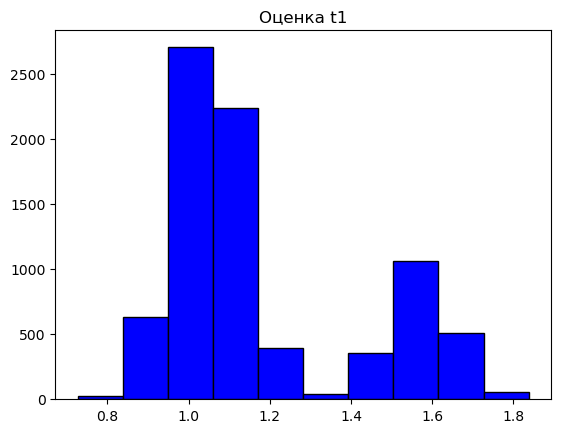

In [21]:
def calculate_estimates(alpha1, alpha2, alpha3, pi, sigma):
    T1 = alpha1 + np.random.normal(0, sigma)
    T2 = alpha2 + np.random.normal(0, sigma)
    T3 = alpha3 + np.random.normal(0, sigma)

    U1 = T1 + (1/3) * (pi - T1 - T2 - T3)

    return U1, T1

alpha1 = np.pi / 4
alpha2 = np.pi / 6
alpha3 = np.pi / 3
pi = np.pi
sigma = 0.1

for _ in range(iter):
    t1, u1 = calculate_estimates(alpha1, alpha2, alpha3, pi, sigma)
    df.loc[len(df.index)] = [t1, u1]
    
plt.hist(df['t1'], color='blue', edgecolor='black');
plt.title("Оценка t1");

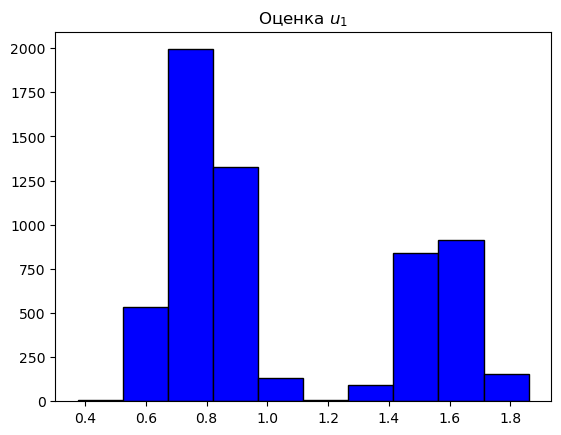

In [20]:
plt.hist(df['u1'], color = 'blue', edgecolor = 'black');
plt.title("Оценка $u_1$");

In [23]:
var1 = df['t1'].std() ** 2
var2 = df['u1'].std() ** 2

print("Var(T1) =", var1)
print("Var(U1) =", var2)
print("Var(T1)/ Var(U1) =", var1 / var2)

Var(T1) = 0.05776128291285001
Var(U1) = 0.12593902376404267
Var(T1)/ Var(U1) = 0.4586448360999734


**Ответ:** Получается что оценка T1 является более эффективной, чем оценка U1, потому что $$Var(T1) < Var(U1)$$ 

## 2.3 Какой тип оценки вы бы выбрали для a1, если известно, что треугольник равнобедренный (т.е. a1 = a2)? Обоснуйте свой ответ, составив модель и проведя 2000 экспериментов.

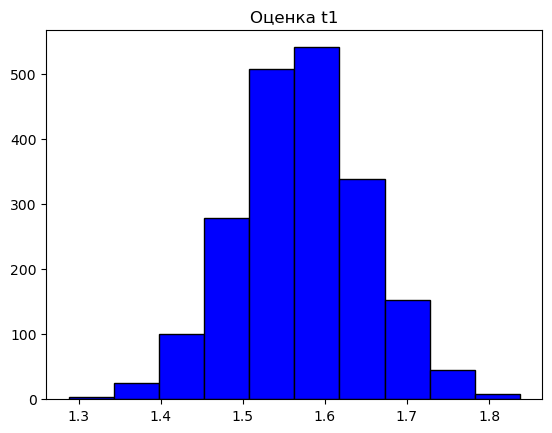

In [10]:
iter = 2000

df = pd.DataFrame(columns=['t1', 'u1'])

alpha1 = np.pi / 2
alpha2 = np.pi / 4
alpha3 = np.pi / 4
pi = np.pi
sigma = 0.1

for _ in range(iter):
    t1, u1 = calculate_estimates(alpha1, alpha2, alpha3, pi, sigma)
    df.loc[len(df.index)] = [t1, u1]
    
plt.hist(df['t1'], color='blue', edgecolor='black');
plt.title("Оценка t1");

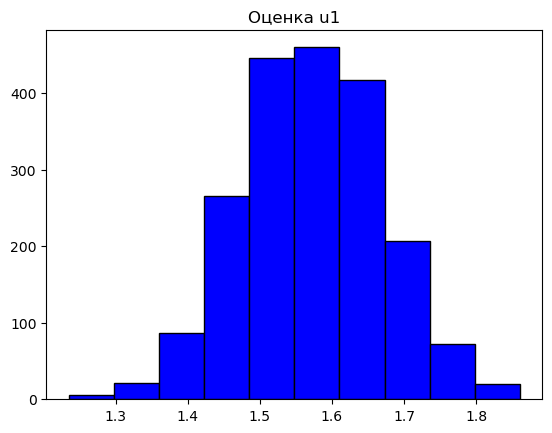

In [11]:
plt.hist(df['u1'], color = 'blue', edgecolor = 'black');
plt.title("Оценка u1");

In [17]:
var1 = df['t1'].std() ** 2
var2 = df['u1'].std() ** 2

print("Var(T1) =", var1)
print("Var(U1) =", var2)
print("Var(T1)/ Var(U1) =", var1 / var2)

Var(T1) = 0.0063319064169616805
Var(U1) = 0.00943383116110661
Var(T1)/ Var(U1) = 0.6711914076930472


**Ответ:** Получается что оценка T1 является более эффективной, чем оценка U1, потому что $$Var(T1) < Var(U1)$$ 